In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")

print("Path to dataset files:", path)

Path to dataset files: /home/honey/.cache/kagglehub/datasets/rohanrao/nifty50-stock-market-data/versions/15


In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
csv_files = os.listdir(path)
print(csv_files)

['MM.csv', 'NTPC.csv', 'ZEEL.csv', 'BHARTIARTL.csv', 'NIFTY50_all.csv', 'COALINDIA.csv', 'INDUSINDBK.csv', 'INFY.csv', 'ULTRACEMCO.csv', 'IOC.csv', 'INFRATEL.csv', 'HCLTECH.csv', 'CIPLA.csv', 'DRREDDY.csv', 'POWERGRID.csv', 'stock_metadata.csv', 'MARUTI.csv', 'TITAN.csv', 'AXISBANK.csv', 'VEDL.csv', 'BPCL.csv', 'SUNPHARMA.csv', 'TECHM.csv', 'ITC.csv', 'ASIANPAINT.csv', 'ONGC.csv', 'ICICIBANK.csv', 'BAJFINANCE.csv', 'HINDALCO.csv', 'SBIN.csv', 'WIPRO.csv', 'RELIANCE.csv', 'JSWSTEEL.csv', 'NESTLEIND.csv', 'TCS.csv', 'KOTAKBANK.csv', 'HDFC.csv', 'TATAMOTORS.csv', 'HEROMOTOCO.csv', 'BAJAJFINSV.csv', 'GRASIM.csv', 'UPL.csv', 'HINDUNILVR.csv', 'EICHERMOT.csv', 'SHREECEM.csv', 'LT.csv', 'BRITANNIA.csv', 'TATASTEEL.csv', 'ADANIPORTS.csv', 'GAIL.csv', 'HDFCBANK.csv', 'BAJAJ-AUTO.csv']


In [7]:
# Start with an empty DataFrame
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate into the DataFrame
for csv_file in csv_files:
    if csv_file != "stock_metadata.csv":
        df = pd.read_csv(path + "/" + csv_file)
        # df["ListedCompany"] = csv_file.split(".")[0]
        combined_df = pd.concat([combined_df, df], ignore_index=True)
# Display the first few rows of the DataFrame to check the data
display(combined_df.head())

/tmp/ipykernel_7120/1891772181.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, df], ignore_index=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,M&M,EQ,419.75,453.30,453.35,448.90,453.35,453.35,453.18,67195,3.045174e+12,NaN,NaN,NaN
1,2000-01-04,M&M,EQ,453.35,489.60,489.65,489.60,489.65,489.65,489.65,37470,1.834710e+12,NaN,NaN,NaN
2,2000-01-05,M&M,EQ,489.65,528.85,528.85,451.15,519.00,514.85,521.37,227621,1.186745e+13,NaN,NaN,NaN
3,2000-01-06,M&M,EQ,514.85,528.00,550.00,518.00,521.00,524.55,538.27,198870,1.070456e+13,NaN,NaN,NaN
4,2000-01-07,M&M,EQ,524.55,515.00,522.00,490.00,498.90,496.40,508.09,91052,4.626258e+12,NaN,NaN,NaN


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470384 entries, 0 to 470383
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                470384 non-null  object 
 1   Symbol              470384 non-null  object 
 2   Series              470384 non-null  object 
 3   Prev Close          470384 non-null  float64
 4   Open                470384 non-null  float64
 5   High                470384 non-null  float64
 6   Low                 470384 non-null  float64
 7   Last                470384 non-null  float64
 8   Close               470384 non-null  float64
 9   VWAP                470384 non-null  float64
 10  Volume              470384 non-null  object 
 11  Turnover            470384 non-null  float64
 12  Trades              240688 non-null  float64
 13  Deliverable Volume  438230 non-null  float64
 14  %Deliverble         438230 non-null  float64
dtypes: float64(11), object(4)
memory u

In [9]:
combined_df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Turnover,Trades,Deliverable Volume,%Deliverble
count,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,4.703840e+05,2.406880e+05,4.382300e+05,438230.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.132300,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.367576,2585.256861,2619.646432,2546.618689,2581.389799,2582.138197,2582.697234,3.298082e+14,6.866443e+04,2.831667e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.697500,1.612816e+13,2.183400e+04,1.253825e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.940000,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.662500,1.863835e+14,7.893550e+04,1.452238e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


combined_df[0]

In [14]:
combined_df.iloc[0].to_dict()

{'Date': '2000-01-03',
 'Symbol': 'M&M',
 'Series': 'EQ',
 'Prev Close': 419.75,
 'Open': 453.3,
 'High': 453.35,
 'Low': 448.9,
 'Last': 453.35,
 'Close': 453.35,
 'VWAP': 453.18,
 'Volume': 67195,
 'Turnover': 3045173830000.0,
 'Trades': nan,
 'Deliverable Volume': nan,
 '%Deliverble': nan}

In [17]:
# Convert Date to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Calculate %K and %D
lookback = 14  # Typically, a 14-day period is used

# Rolling high and low for the lookback period
combined_df['L14'] = combined_df['Low'].rolling(window=lookback).min()
combined_df['H14'] = combined_df['High'].rolling(window=lookback).max()

# %K calculation
combined_df['%K'] = ((combined_df['Close'] - combined_df['L14']) / (combined_df['H14'] - combined_df['L14'])) * 100

# %D calculation (3-day SMA of %K)
combined_df['%D'] = combined_df['%K'].rolling(window=3).mean()

# Display the results
display(combined_df[['Date', 'Symbol', 'Close', '%K', '%D']][14:])

,Date,Symbol,Close,%K,%D
14,2000-01-21,M&M,550.00,58.577778,NaN
15,2000-01-24,M&M,514.70,37.659259,56.143340
16,2000-01-25,M&M,507.25,27.040155,41.092397
17,2000-01-27,M&M,499.30,21.891192,28.863535
18,2000-01-28,M&M,511.10,29.533679,26.155009
...,...,...,...,...,...
470379,2021-04-26,BAJAJ-AUTO,3738.85,96.639073,80.526923
470380,2021-04-27,BAJAJ-AUTO,3785.50,96.438746,88.048736
470381,2021-04-28,BAJAJ-AUTO,3889.75,87.327416,93.468412
470382,2021-04-29,BAJAJ-AUTO,3836.45,76.769170,86.845111


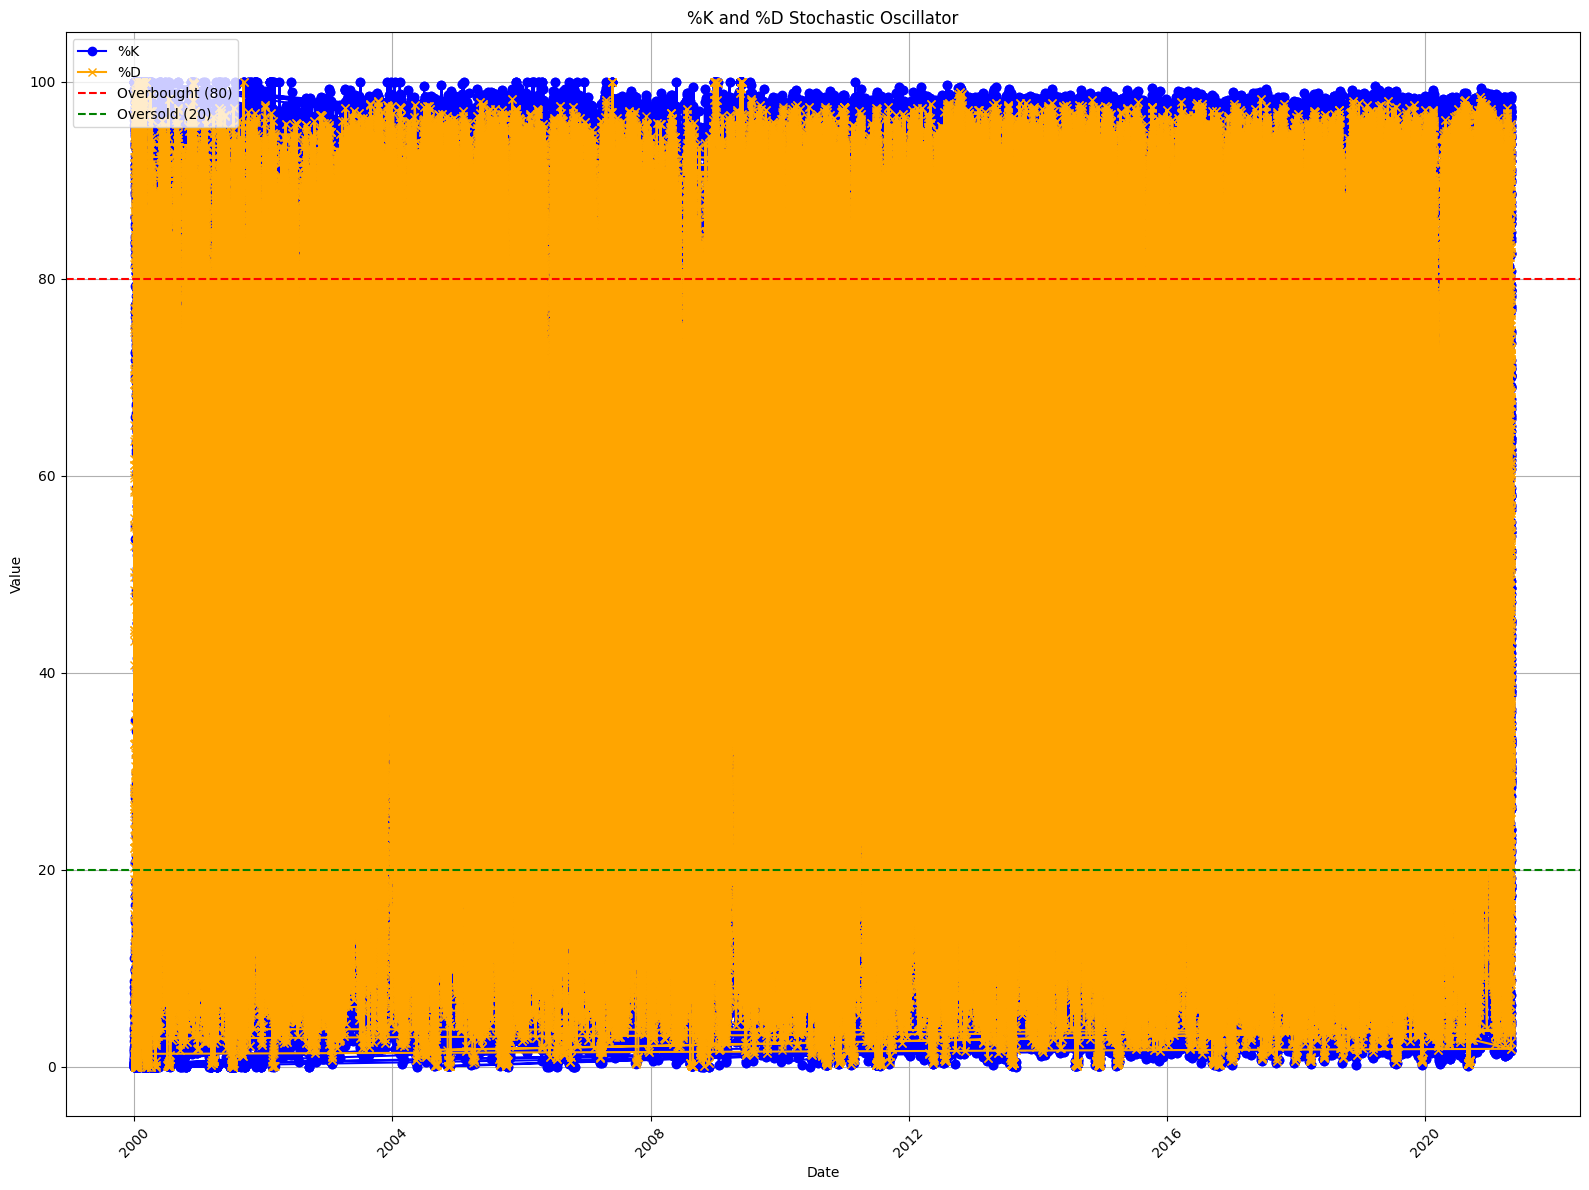

In [20]:
# Plotting the chart
plt.figure(figsize=(16, 12))
plt.plot(combined_df['Date'], combined_df['%K'], label='%K', marker='o', color='blue')
plt.plot(combined_df['Date'], combined_df['%D'], label='%D', marker='x', color='orange')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('%K and %D Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
